In [1]:
#Import pandas 
import pandas as pd 
# Numpy is your friend 
import numpy as np 

# The following is to make some plots along the way 
import seaborn as sns 
from matplotlib import pyplot as plt 
%matplotlib inline

# Some quick utilts to avoid filling this notebook with support code 
from utils import get_heights_data_metric, get_heights_data_freedom_units, \
                  get_data_for_spearman, quick_scatterplot, \
                  scatter_plot, plot_correlated_distrs, \
                  plot_positive_and_negative, plot_correlated_distrs, \
                  plot_correlation_bars, plot_angled_correlations

In [2]:
data_metric = get_heights_data_metric()
data_metric

,ages,heights
0,2,120
1,4,125
2,4,127
3,6,135
4,8,140
5,9,139
6,12,170
7,14,210


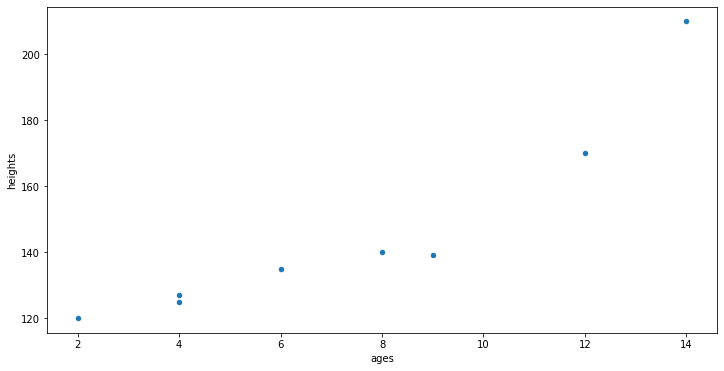

In [16]:
quick_scatterplot(data_metric)

<AxesSubplot:xlabel='ages', ylabel='heights'>

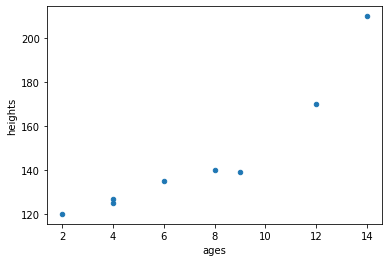

In [17]:
data_metric.plot(x = 'ages', y='heights',kind = 'scatter')

In [18]:
data_metric

,ages,heights
0,2,120
1,4,125
2,4,127
3,6,135
4,8,140
5,9,139
6,12,170
7,14,210


In [64]:
data_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ages          8 non-null      int64  
 1   heights       8 non-null      int64  
 2   diff_ages     8 non-null      float64
 3   diff_heights  8 non-null      float64
 4   prod          8 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 448.0 bytes


In [21]:
data_metric['diff_ages']=data_metric.ages-data_metric.ages.mean()

In [22]:
data_metric['diff_heights']=data_metric.heights-data_metric.heights.mean()

In [23]:
data_metric

,ages,heights,diff_ages,diff_heights
0,2,120,-5.375,-25.75
1,4,125,-3.375,-20.75
2,4,127,-3.375,-18.75
3,6,135,-1.375,-10.75
4,8,140,0.625,-5.75
5,9,139,1.625,-6.75
6,12,170,4.625,24.25
7,14,210,6.625,64.25


In [25]:
data_metric['prod'] = data_metric.diff_ages*data_metric.diff_heights

In [27]:
data_metric

,ages,heights,diff_ages,diff_heights,prod
0,2,120,-5.375,-25.75,138.40625
1,4,125,-3.375,-20.75,70.03125
2,4,127,-3.375,-18.75,63.28125
3,6,135,-1.375,-10.75,14.78125
4,8,140,0.625,-5.75,-3.59375
5,9,139,1.625,-6.75,-10.96875
6,12,170,4.625,24.25,112.15625
7,14,210,6.625,64.25,425.65625


In [36]:
cov =data_metric['prod'].sum()/(data_metric.shape[0]-1)

In [38]:
print("Covariance is %0.2f"%cov)

Covariance is 115.68


In [39]:
print("Covariance is {}".format(cov))

Covariance is 115.67857142857143


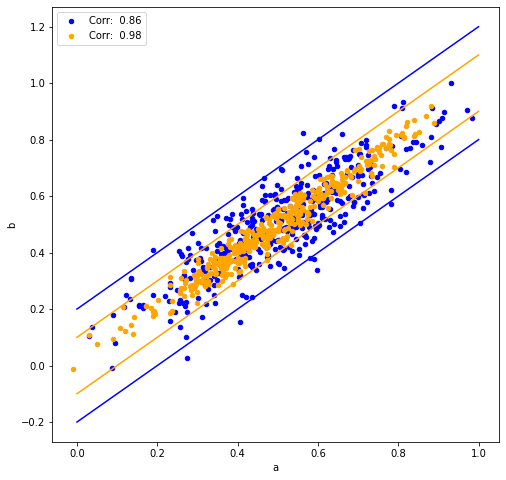

In [42]:
plot_correlation_bars()

In [43]:
data_metric

,ages,heights,diff_ages,diff_heights,prod
0,2,120,-5.375,-25.75,138.40625
1,4,125,-3.375,-20.75,70.03125
2,4,127,-3.375,-18.75,63.28125
3,6,135,-1.375,-10.75,14.78125
4,8,140,0.625,-5.75,-3.59375
5,9,139,1.625,-6.75,-10.96875
6,12,170,4.625,24.25,112.15625
7,14,210,6.625,64.25,425.65625


In [44]:
data_metric['ages'].corr(data_metric['heights'],method ='spearman')

0.9700772721497398

In [45]:
data_metric.rank()

,ages,heights,diff_ages,diff_heights,prod
0,1.0,1.0,1.0,1.0,7.0
1,2.5,2.0,2.5,2.0,5.0
2,2.5,3.0,2.5,3.0,4.0
3,4.0,4.0,4.0,4.0,3.0
4,5.0,6.0,5.0,6.0,2.0
5,6.0,5.0,6.0,5.0,1.0
6,7.0,7.0,7.0,7.0,6.0
7,8.0,8.0,8.0,8.0,8.0


In [48]:
data = pd.read_csv('data/HousingData.csv')
data.head()

,crime,industrial,river,buildings_age,roads_quality,school_quality,taxes,poverty,house_price,number_of_rooms,pollution
0,0.00632,2.31,0,65.2,1,15.3,296,4.98,24.0,6.575,0.538
1,0.02731,7.07,0,78.9,2,17.8,242,9.14,21.6,6.421,0.469
2,0.03237,2.18,0,45.8,3,18.7,222,2.94,33.4,6.998,0.458
3,0.06905,2.18,0,54.2,3,18.7,222,5.33,36.2,7.147,0.458
4,0.08829,7.87,0,66.6,5,15.2,311,12.43,22.9,6.012,0.524


In [50]:
data.corr(method = 'spearman')

,crime,industrial,river,buildings_age,roads_quality,school_quality,taxes,poverty,house_price,number_of_rooms,pollution
crime,1.000000,0.716141,0.049634,0.687769,0.743551,0.447832,0.733739,0.628033,-0.534132,-0.365601,0.810363
industrial,0.716141,1.000000,0.058475,0.676174,0.426468,0.439699,0.662924,0.640548,-0.578948,-0.477690,0.775785
river,0.049634,0.058475,1.000000,0.053065,0.047720,-0.129726,-0.022240,-0.055879,0.161465,0.089670,0.054184
buildings_age,0.687769,0.676174,0.053065,1.000000,0.402137,0.365831,0.539486,0.649010,-0.554843,-0.304442,0.797865
roads_quality,0.743551,0.426468,0.047720,0.402137,1.000000,0.310982,0.718027,0.377305,-0.306717,-0.136979,0.573285
school_quality,0.447832,0.439699,-0.129726,0.365831,0.310982,1.000000,0.448872,0.464295,-0.537671,-0.334715,0.387848
taxes,0.733739,0.662924,-0.022240,0.539486,0.718027,0.448872,1.000000,0.536474,-0.541798,-0.320051,0.659546
poverty,0.628033,0.640548,-0.055879,0.649010,0.377305,0.464295,0.536474,1.000000,-0.864600,-0.646131,0.637902
house_price,-0.534132,-0.578948,0.161465,-0.554843,-0.306717,-0.537671,-0.541798,-0.864600,1.000000,0.635173,-0.557114
number_of_rooms,-0.365601,-0.477690,0.089670,-0.304442,-0.136979,-0.334715,-0.320051,-0.646131,0.635173,1.000000,-0.361764


<AxesSubplot:>

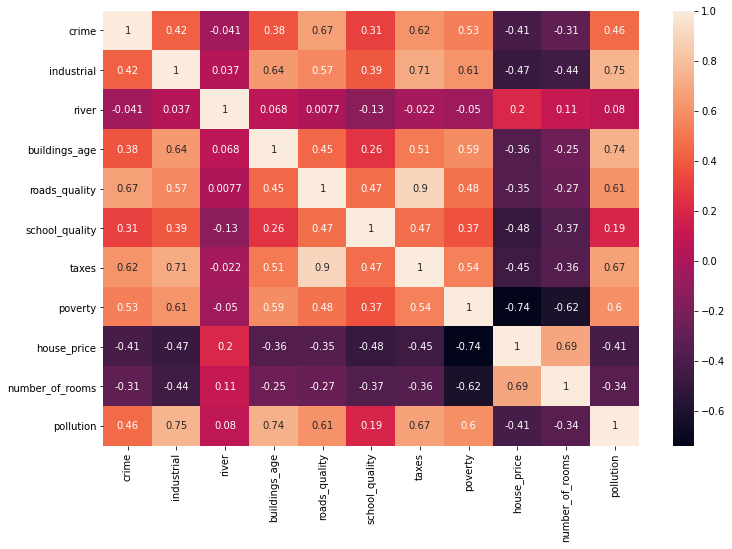

In [53]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot = True)

In [55]:
cor_mat = data.corr()

In [59]:
np.triu(np.ones(cor_mat.shape)).astype(np.bool)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True],
       [False, False, False, False, False, False, False, Fal

In [61]:
a = pd.Series([1, 5, 7, 10, 25])
b = pd.Series([15, 30, 28, 45, 50])
(a - a.mean())*(b-b.mean())

0    159.96
1     16.56
2     14.56
3      4.56
4    252.56
dtype: float64

In [ ]:
def covariance_top_half(s1, s2):
    """ 
    Top half of the fraction 
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        top_half_value (float): value of the top half of the fraction 
    """    
    # Note: it is generally best to do this is multiple small steps 
    # e.g. start by making s1_avg, then later s1_minus_s1_avg, etc...
    
    # YOUR CODE HERE
    (s1 - s1.mean())(s2-s2.mean())
    #raise NotImplementedError()

def covariance_bottom_half(s1, s2):
    """ 
    Bottom half of the fraction 
    
    Args:
        s1 (pd.Series): a pandas series 
        s2 (pd.Series): a pandas series (the same index and length as s1)

    Returns:
        bottom_half_value (float): value of the bottom half of the fraction 
    """    
    # YOUR CODE HERE
    raise NotImplementedError()


def covariance_by_hand(s1, s2):
    top_half = covariance_top_half(s1, s2)
    bottom_half = covariance_bottom_half(s1, s2)
    return top_half / bottom_half

In [65]:
data_metric

,ages,heights,diff_ages,diff_heights,prod
0,2,120,-5.375,-25.75,138.40625
1,4,125,-3.375,-20.75,70.03125
2,4,127,-3.375,-18.75,63.28125
3,6,135,-1.375,-10.75,14.78125
4,8,140,0.625,-5.75,-3.59375
5,9,139,1.625,-6.75,-10.96875
6,12,170,4.625,24.25,112.15625
7,14,210,6.625,64.25,425.65625


In [67]:
data_metric.describe()

,ages,heights,diff_ages,diff_heights,prod
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,7.375000,145.750000,0.000000,0.000000,101.218750
std,4.172615,30.131853,4.172615,30.131853,141.531057
min,2.000000,120.000000,-5.375000,-25.750000,-10.968750
25%,4.000000,126.500000,-3.375000,-19.250000,10.187500
50%,7.000000,137.000000,-0.375000,-8.750000,66.656250
75%,9.750000,147.500000,2.375000,1.750000,118.718750
max,14.000000,210.000000,6.625000,64.250000,425.656250


In [69]:
data_metric.ages.std()

4.172614801981401

In [70]:
data_metric.ages.rank()

0    1.0
1    2.5
2    2.5
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
Name: ages, dtype: float64

In [71]:
stocks = pd.read_csv('data/Stock_prices.csv')

# Explore the dataset. 
# Hint 1: you can use display(<name of df>) to force it to pretty print
# Hint 2: use the heatmap of the correlation matrix that we used in the learning notebooks 
# Hint 3: you may want to import something to help with the visualization 
# Hint 4: you can either paste the answers, or use a purely programmatic solution. 
# Hint 5: when we say lowest and highest we mean the sign, not the "magnitude"

In [72]:
stocks.head(n=5)

,date,Microchip Technology,Lennar Corp.,Ulta Beauty,Occidental Petroleum,Exxon Mobil Corp.,Apache Corporation,General Motors,People's United Financial,ConocoPhillips,Cboe Global Markets,Skyworks Solutions,QUALCOMM Inc.,Northern Trust Corp.,Ross Stores,Halliburton Co.,Marathon Oil Corp.,Oil Price
0,2014-01-02,44.17,38.6471,95.91,93.85,99.75,85.48,40.95,15.01,69.78,50.98,27.40,73.32,60.89,37.135,50.01,34.91,107.94
1,2014-01-03,44.54,38.0882,94.92,93.52,99.51,85.54,39.57,15.06,69.96,51.66,27.72,72.89,61.30,37.165,50.13,34.52,106.57
2,2014-01-06,44.45,37.4412,92.91,93.80,99.66,86.31,40.40,15.10,70.26,50.93,27.63,72.70,60.92,37.090,50.32,34.43,106.71
3,2014-01-07,44.70,37.6078,94.46,95.55,101.07,87.90,40.20,15.15,70.37,50.69,27.79,73.24,61.70,36.885,50.20,34.88,107.01
4,2014-01-08,45.29,37.8529,94.17,94.79,100.74,86.65,40.42,15.42,69.69,50.02,27.92,73.68,62.02,36.850,49.50,34.40,107.42


In [73]:
import seaborn as sns
plt.figure(figsize=(14,14))
tr_matrix = np.triu(np.ones(stocks.corr().shape)).astype(np.bool)
tr_matrix

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False

<Figure size 1008x1008 with 0 Axes>

In [74]:
st_mask_corr = stocks.corr().mask(tr_matrix)
st_mask_corr

,Microchip Technology,Lennar Corp.,Ulta Beauty,Occidental Petroleum,Exxon Mobil Corp.,Apache Corporation,General Motors,People's United Financial,ConocoPhillips,Cboe Global Markets,Skyworks Solutions,QUALCOMM Inc.,Northern Trust Corp.,Ross Stores,Halliburton Co.,Marathon Oil Corp.,Oil Price
Microchip Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lennar Corp.,0.626774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ulta Beauty,0.688068,0.510985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occidental Petroleum,-0.571467,-0.659883,-0.809050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exxon Mobil Corp.,-0.356930,-0.646565,-0.576322,0.889832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apache Corporation,-0.417272,-0.708051,-0.653056,0.922937,0.907177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
General Motors,0.575763,0.415100,-0.018019,0.001314,0.060464,0.057739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
People's United Financial,0.781263,0.598202,0.732700,-0.626316,-0.460049,-0.464928,0.483060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConocoPhillips,-0.398179,-0.429120,-0.793888,0.863826,0.766737,0.863346,0.252374,-0.453052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cboe Global Markets,0.904968,0.790473,0.629068,-0.673373,-0.538489,-0.637683,0.524639,0.743389,-0.504845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
st_mask_corr.unstack().nlargest()

ConocoPhillips        Marathon Oil Corp.    0.973070
Occidental Petroleum  Apache Corporation    0.922937
                      Marathon Oil Corp.    0.913058
Apache Corporation    Marathon Oil Corp.    0.911171
Exxon Mobil Corp.     Apache Corporation    0.907177
dtype: float64

In [80]:
st_mask_corr.unstack().nsmallest(1)

Occidental Petroleum  Ross Stores   -0.825415
dtype: float64